# Statistics (Part 3): 

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

# Demo 1: correlation coefficients

In [15]:
agedepth = np.loadtxt('agedepth.txt')

age   = agedepth[:,0]
depth = agedepth[:,1]

Text(0, 0.5, 'sediment age (ka)')

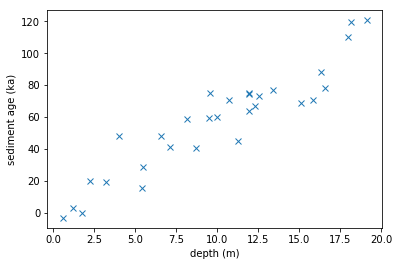

In [16]:
plt.plot(age,depth,'x')
plt.xlabel('depth (m)')
plt.ylabel('sediment age (ka)')

In [19]:
dmean = np.mean(depth)
amean = np.mean(age)

In [20]:
dstd = np.std(depth)
astd = np.std(age)

In [22]:
N = age.shape[0]

In [24]:
r_da = (1/(N-1))*(1/dstd)*(1/astd)*np.sum( (depth - dmean)*(age - amean) ) 
print(r_da)

0.9663864588244147


In [28]:
np.corrcoef(age,depth)

array([[1.        , 0.93417358],
       [0.93417358, 1.        ]])

In [32]:
# Random data
depth = np.random.randn(N)
age  = np.random.randn(N)



In [33]:
# Introduce outliers:
depth[-1] = 20
age[-1]   = 20

Demonstrate method for dealing with outliers: calculate statistic  with subset of data

In [42]:
f = 0.85                                    # fraction of samples to include
k = np.round(f*N).astype(int)               # integer number of indices to exclude
N_random_indices = np.random.permutation(N) # generate random permutation of N indices
k_random_indices = N_random_indices[1:k]    # select first k random indices

In [43]:
np.corrcoef(age[k_random_indices],depth[k_random_indices])

array([[1.        , 0.93523747],
       [0.93523747, 1.        ]])

Repeat the above example in a loop: 

In [44]:
f = 0.85                                    # fraction of samples to include
k = np.round(f*N).astype(int)               # integer number of indices to exclude

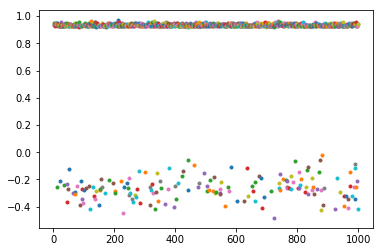

In [47]:
fig, ax = plt.subplots()

for i in range(1,1001):
    N_random_indices = np.random.permutation(N)
    k_random_indices = N_random_indices[1:k]
    r_da_random      = np.corrcoef(age[k_random_indices],depth[k_random_indices])
    
    ax.plot(i,r_da_random[0,1],'.')

# Demo 2: linear regression 
back to age-depth data!

In [48]:
agedepth = np.loadtxt('agedepth.txt')

age   = agedepth[:,0]
depth = agedepth[:,1]